In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### path dir in gdrive
trainpath ='/content/drive/My Drive/new_test/ttttt/tomato/New Plant Diseases Dataset(Augmented)/'
testpath = '/content/drive/My Drive/new_test/ttttt/tomato/New Plant Diseases Dataset(Augmented)/'
predpath = '/content/drive/My Drive/new_test/ttttt/testcnn'
#catago=["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_Yellow_Leaf_Curl_Virus","Tomato___Tomato_mosaic_virus","Tomato___healthy"]





In [ ]:
#first check the Train folder to have a look to its content

In [ ]:
for folder in  os.listdir(trainpath + 'train') : 
    files = os.listdir(os.path.join(trainpath +'train/' + folder ))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 1702 in folder Tomato___Bacterial_spot
For training data , found 1920 in folder Tomato___Early_blight
For training data , found 1851 in folder Tomato___Late_blight
For training data , found 1882 in folder Tomato___Leaf_Mold
For training data , found 1745 in folder Tomato___Septoria_leaf_spot
For training data , found 1741 in folder Tomato___Spider_mites Two-spotted_spider_mite
For training data , found 1827 in folder Tomato___Target_Spot
For training data , found 1961 in folder Tomato___Tomato_Yellow_Leaf_Curl_Virus
For training data , found 1790 in folder Tomato___Tomato_mosaic_virus
For training data , found 1926 in folder Tomato___healthy


In [ ]:
#check the Train folder to have a look to its content
for folder in  os.listdir(trainpath + 'valid') : 
    files = os.listdir(os.path.join(trainpath +'valid/' + folder ))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 425 in folder Tomato___Bacterial_spot
For testing data , found 480 in folder Tomato___Early_blight
For testing data , found 463 in folder Tomato___Late_blight
For testing data , found 470 in folder Tomato___Leaf_Mold
For testing data , found 436 in folder Tomato___Septoria_leaf_spot
For testing data , found 435 in folder Tomato___Spider_mites Two-spotted_spider_mite
For testing data , found 457 in folder Tomato___Target_Spot
For testing data , found 490 in folder Tomato___Tomato_Yellow_Leaf_Curl_Virus
For testing data , found 448 in folder Tomato___Tomato_mosaic_virus
For testing data , found 481 in folder Tomato___healthy


In [ ]:
#check the pred folder to have a look to its content
files = os.listdir(predpath)
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 762


In [ ]:
#Checking Images
#now we need to heck the images sizes , to know ow they looks like

In [ ]:
#code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}
code={"Tomato___Bacterial_spot":0,"Tomato___Early_blight":1,"Tomato___Late_blight":2,"Tomato___Leaf_Mold":3,"Tomato___Septoria_leaf_spot":4,"Tomato___Spider_mites Two-spotted_spider_mite":5,"Tomato___Target_Spot":6,"Tomato___Tomato_Yellow_Leaf_Curl_Virus":7,"Tomato___Tomato_mosaic_virus":8,"Tomato___healthy":9}


def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [ ]:
#images sizes in train folder
size = []
for folder in  os.listdir(trainpath +'train') : 
    files = os.listdir(os.path.join( trainpath +'train/' + folder ))
    for file in files[0:300]:
        fille=os.path.join(os.path.join( trainpath +'train/' + folder )+'/'+file)
        image = plt.imread(fille)
        size.append(image.shape)
pd.Series(size).value_counts()
print(size)

[(256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256

In [ ]:
#images test in train folder
size = []
for folder in  os.listdir(trainpath +'valid') : 
    files = os.listdir(os.path.join( trainpath +'valid/' + folder ))
    for file in files[0:30]:
        fille=os.path.join(os.path.join( trainpath +'valid/' + folder )+'/'+file)
        image = plt.imread(fille)
        size.append(image.shape)
pd.Series(size).value_counts()

(256, 256, 3)    300
dtype: int64

In [ ]:
#images sizes in pred folder
size = []
files = os.listdir(predpath )
for file in files:
    fille=os.path.join(predpath,file) 
    image = plt.imread(fille)
    size.append(image.shape)
pd.Series(size).value_counts()


(256, 256, 3)    50
dtype: int64

In [ ]:
#Reading Images
#now it's time to read all images & convert it into arrays

In [ ]:
#read all pictues in ten categories in training folder, ans use OpenCV to resize it 

s = 256

In [ ]:
X_train = []
y_train = []
for folder in  os.listdir(os.path.join(trainpath+'train')) : 
    files = os.path.join(trainpath+'train/'+folder )
    for file in os.listdir(files)[0:1000]: 
        fille=os.path.join(os.path.join( trainpath +'train/' + folder )+'/'+file)
        image = cv2.imread(fille)
        image_array =cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [ ]:

print(f'we have {len(X_train)} items in X_train')           #how many items in X_train

we have 10000 items in X_train


In [ ]:
# look to random pictures in X_train , and to adjust their title using the y value

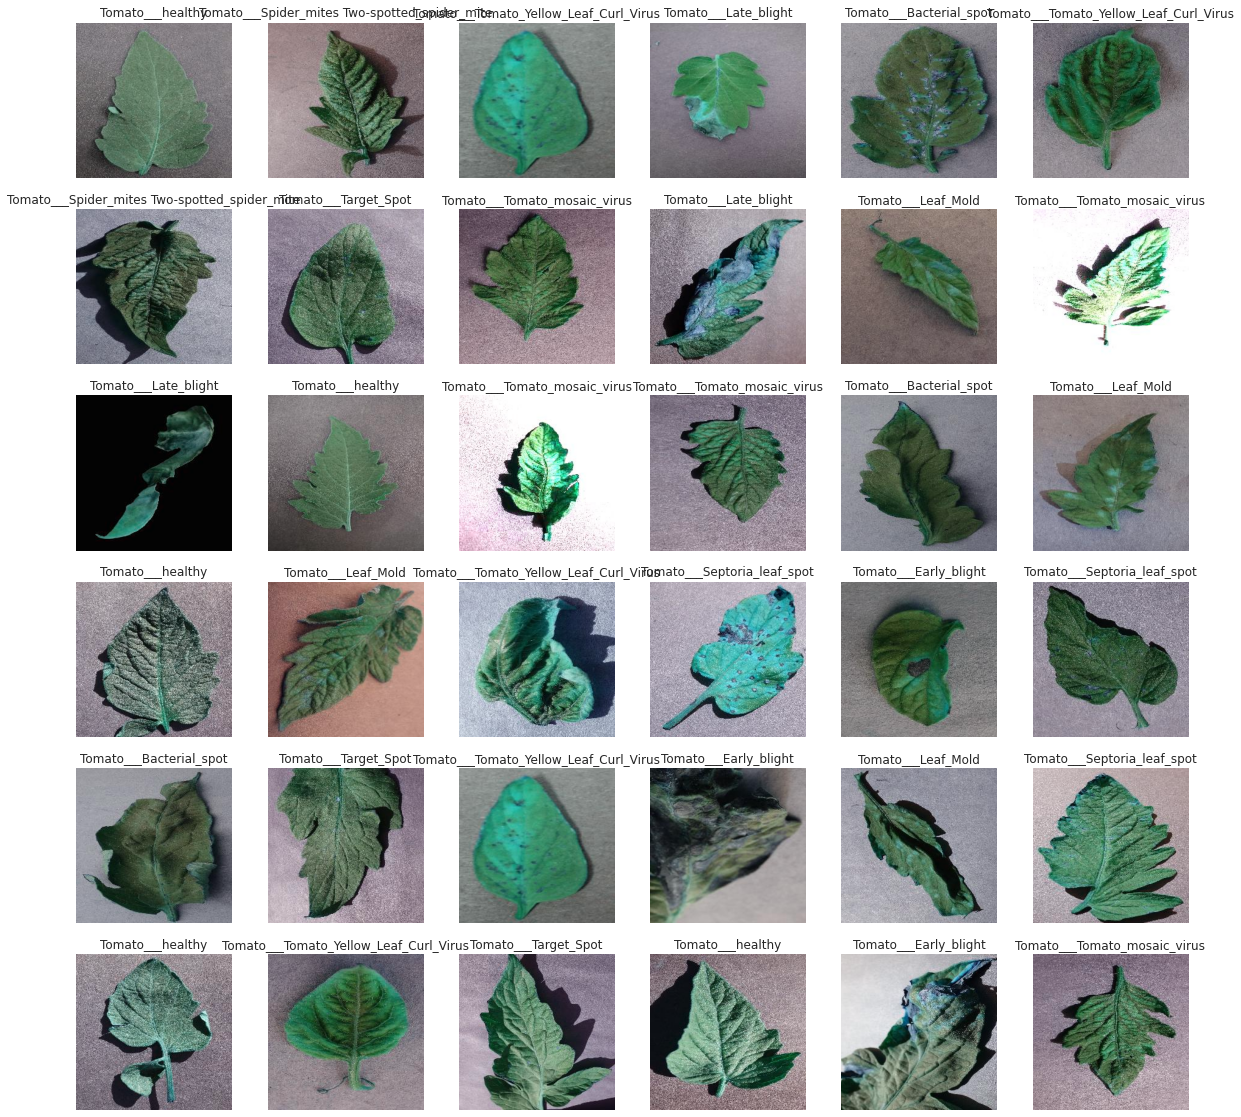

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [ ]:
#read all pictues in ten categories in testing folder, ans use OpenCV to resize it 

In [ ]:
X_test = []
y_test = []
for folder in  os.listdir(os.path.join(testpath+'valid')) : 
    files = os.path.join(testpath+'valid/'+folder )
    for file in os.listdir(files)[0:350]: 
        fille=os.path.join(os.path.join( trainpath +'valid/' + folder )+'/'+file)
        image = cv2.imread(fille)
        image_array = cv2.resize(image ,(s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [ ]:
#how many items in X_test
print(f'we have {len(X_test)} items in X_test')

we have 3500 items in X_test


In [ ]:
#Verify the test data
#To verify that the dataset looks correct, let's plot  36 images from
 #the training set and display the class name below each image.

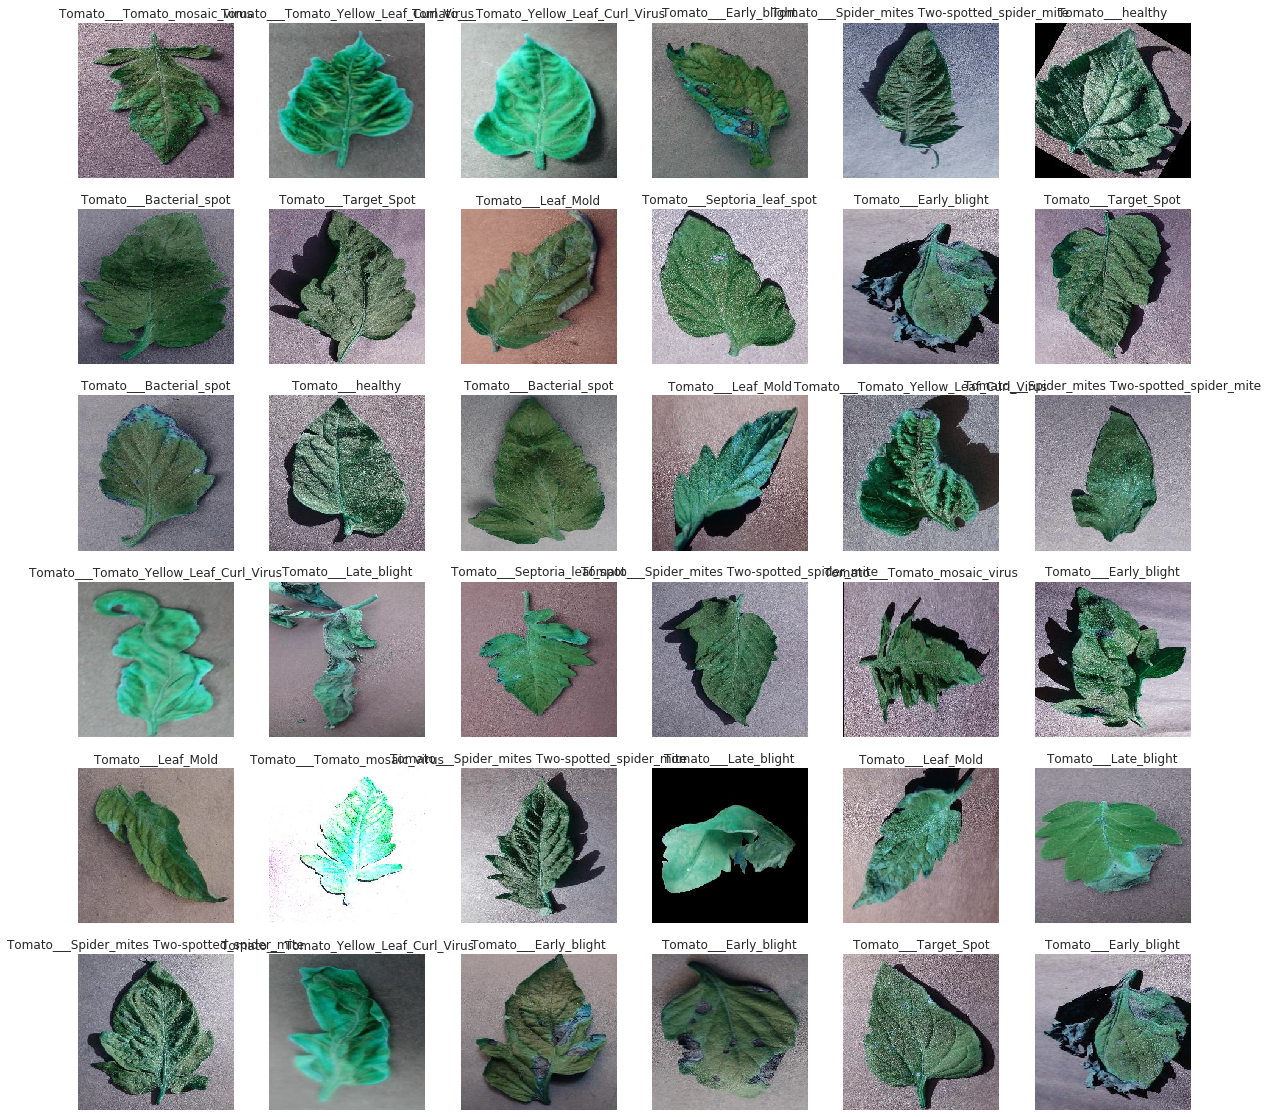

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [ ]:
X_pred = []
files =os.listdir(predpath)
for file in files[0:500]:
    fille=os.path.join(predpath,file)
    image = cv2.imread(fille)
    image_array = cv2.resize(image ,(s,s))
    X_pred.append(list(image_array))

In [ ]:
print(f'we have {len(X_pred)} items in X_pred')              #how many item in x_pred

we have 500 items in X_pred


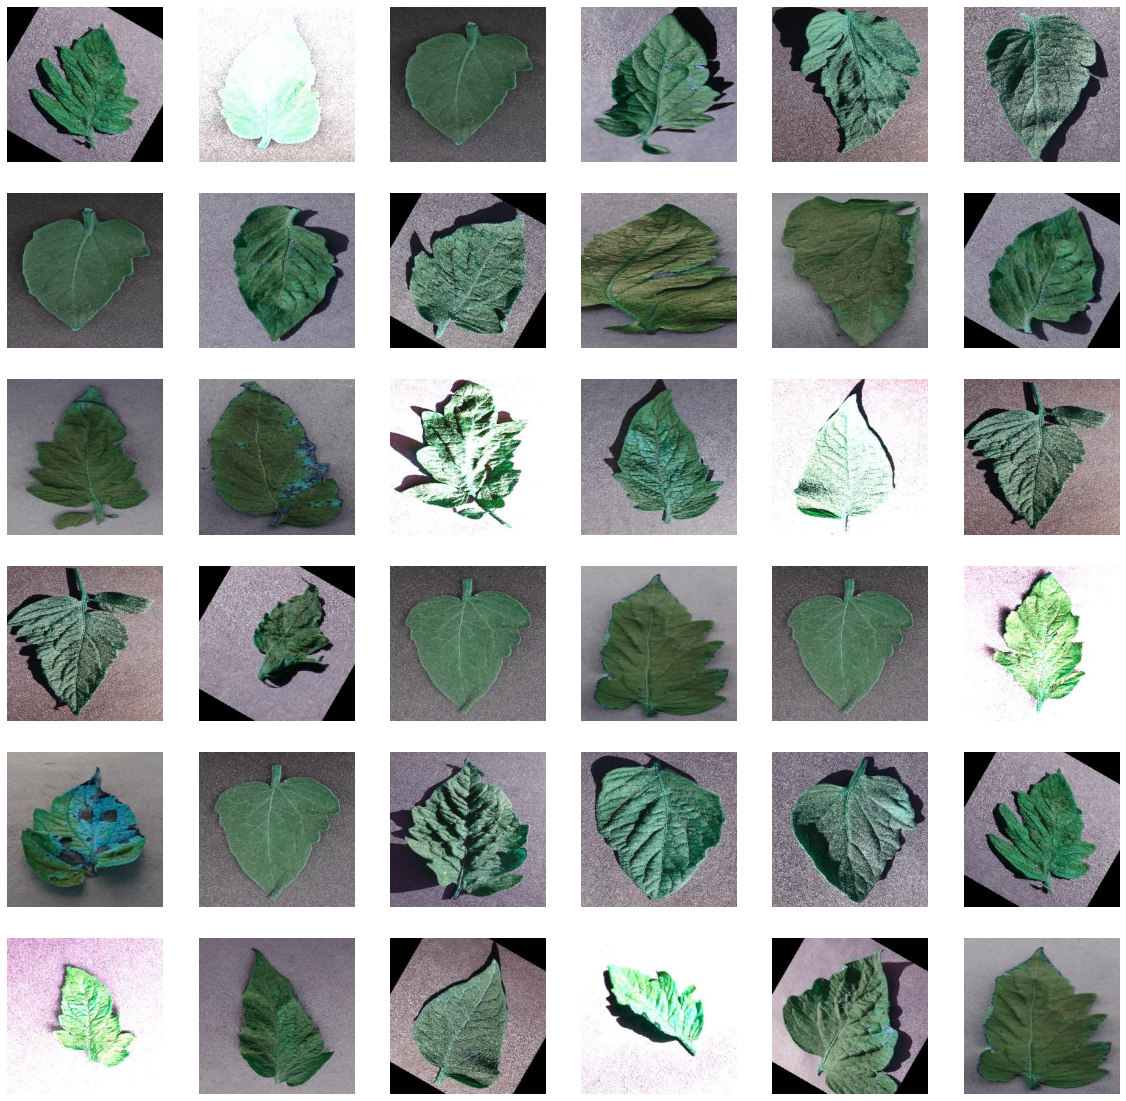

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [ ]:
# convert the data into arrays using numpy

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (10000, 256, 256, 3)
X_test shape  is (3500, 256, 256, 3)
X_pred shape  is (500, 256, 256, 3)
y_train shape  is (10000,)
y_test shape  is (3500,)


In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
##Building The Model
#Create the convolutional base

In [ ]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(224,kernel_size=(3,3),padding='same',activation='relu',input_shape=(s,s,3)),
       
        keras.layers.Conv2D(200,kernel_size=(3,3),padding='same',activation='relu'),
        
        keras.layers.MaxPool2D(4,4),
      ## keras.layers.BatchNormalization(),
        keras.layers.Conv2D(198,kernel_size=(3,3),padding='same',activation='relu'), 
         keras.layers.MaxPool2D(4,4),
         keras.layers.Conv2D(196,kernel_size=(3,3),padding='same',activation='relu'), 
         keras.layers.MaxPool2D(4,4),
         keras.layers.Conv2D(196,kernel_size=(3,3),padding='same',activation='relu'), 
         keras.layers.MaxPool2D(4,4),

         keras.layers.Conv2D(194,kernel_size=(3,3),padding='same',activation='relu'), 
         keras.layers.MaxPool2D(4,4),
         keras.layers.Conv2D(192,kernel_size=(3,3),padding='same',activation='relu'), 
         keras.layers.MaxPool2D(4,4),
         keras.layers.Conv2D(190,kernel_size=(3,3),padding='same',activation='relu'), 
         keras.layers.MaxPool2D(4,4),

         keras.layers.Conv2D(180,kernel_size=(3,3),padding='same',activation='relu'), 
         keras.layers.MaxPool2D(4,4),
         keras.layers.Conv2D(160,kernel_size=(3,3),padding='same',activation='relu'), 
         keras.layers.MaxPool2D(4,4),
         keras.layers.Conv2D(150,kernel_size=(3,3),padding='same',activation='relu'), 
         keras.layers.MaxPool2D(4,4),
         keras.layers.Conv2D(140,kernel_size=(3,3),padding='same',activation='relu'), 
         keras.layers.MaxPool2D(4,4),
         keras.layers.Conv2D(130,kernel_size=(3,3),padding='same',activation='relu'), 
         keras.layers.MaxPool2D(4,4),
         keras.layers.Conv2D(130,kernel_size=(3,3),padding='same',activation='relu'), 
         keras.layers.MaxPool2D(4,4),
         keras.layers.Conv2D(120,kernel_size=(3,3),padding='same',activation='relu'), 
         keras.layers.MaxPool2D(4,4),
         keras.layers.Conv2D(110,kernel_size=(3,3),padding='same',activation='relu'), 
         keras.layers.MaxPool2D(4,4),
         keras.layers.Conv2D(100,kernel_size=(3,3),padding='same',activation='relu'), 
         keras.layers.MaxPool2D(4,4),
         keras.layers.Conv2D(90,kernel_size=(3,3),padding='same',activation='relu'), 
         keras.layers.MaxPool2D(4,4),
         ## keras.layers.BatchNormalization(),   
        keras.layers.Conv2D(80,kernel_size=(3,3),padding='same',activation='relu'),
         keras.layers.MaxPool2D(4,4),
         keras.layers.Conv2D(70,kernel_size=(3,3),padding='same',activation='relu'), 
         keras.layers.MaxPool2D(4,4),
         keras.layers.Conv2D(60,kernel_size=(3,3),padding='same',activation='relu'), 
         keras.layers.MaxPool2D(4,4),
         
         ##keras.layers.BatchNormalization(),   
        keras.layers.Conv2D(50,kernel_size=(3,3),padding='same',activation='relu'),
        
        keras.layers.MaxPool2D(4,4),
       # #keras.layers.BatchNormalization(),
       
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,
         keras.layers.Dropout(rate=0.3),  
        keras.layers.Dense(100,activation='relu') , 
         
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.3) ,
        keras.layers.Dense(10,activation='softmax')   
        ])

In [ ]:
#Compile and train the model
#display the architecture of our model so far

In [ ]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 224)     6272      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 150)     302550    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 150)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 120)       162120    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 120)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 80)        86480     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (Non

In [ ]:
##training the model with 45epochs  #

In [ ]:
epochs = 45
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=32,verbose=1)

Epoch 1/45
10000/10000 [==============================] - 158s 16ms/step - loss: 2.3517 - accuracy: 0.1370
Epoch 2/45
10000/10000 [==============================] - 147s 15ms/step - loss: 1.8757 - accuracy: 0.2980
Epoch 3/45
10000/10000 [==============================] - 147s 15ms/step - loss: 1.3614 - accuracy: 0.5100
Epoch 4/45
10000/10000 [==============================] - 147s 15ms/step - loss: 0.9832 - accuracy: 0.6649
Epoch 5/45
10000/10000 [==============================] - 147s 15ms/step - loss: 0.7906 - accuracy: 0.7295
Epoch 6/45
10000/10000 [==============================] - 147s 15ms/step - loss: 0.6205 - accuracy: 0.7948
Epoch 7/45
10000/10000 [==============================] - 147s 15ms/step - loss: 0.5919 - accuracy: 0.8110
Epoch 8/45
10000/10000 [==============================] - 147s 15ms/step - loss: 0.4723 - accuracy: 0.8454
Epoch 9/45
10000/10000 [==============================] - 147s 15ms/step - loss: 0.4192 - accuracy: 0.8692
Epoch 10/45
10000/10000 [============

In [ ]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

3500/3500 [==============================] - 14s 4ms/step
Test Loss is 0.387799259477111
Test Accuracy is 0.9154285788536072


In [ ]:
#predict X test

In [ ]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (3500, 10)


In [ ]:
#predict X X Predic

In [ ]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

Prediction Shape is (500, 10)


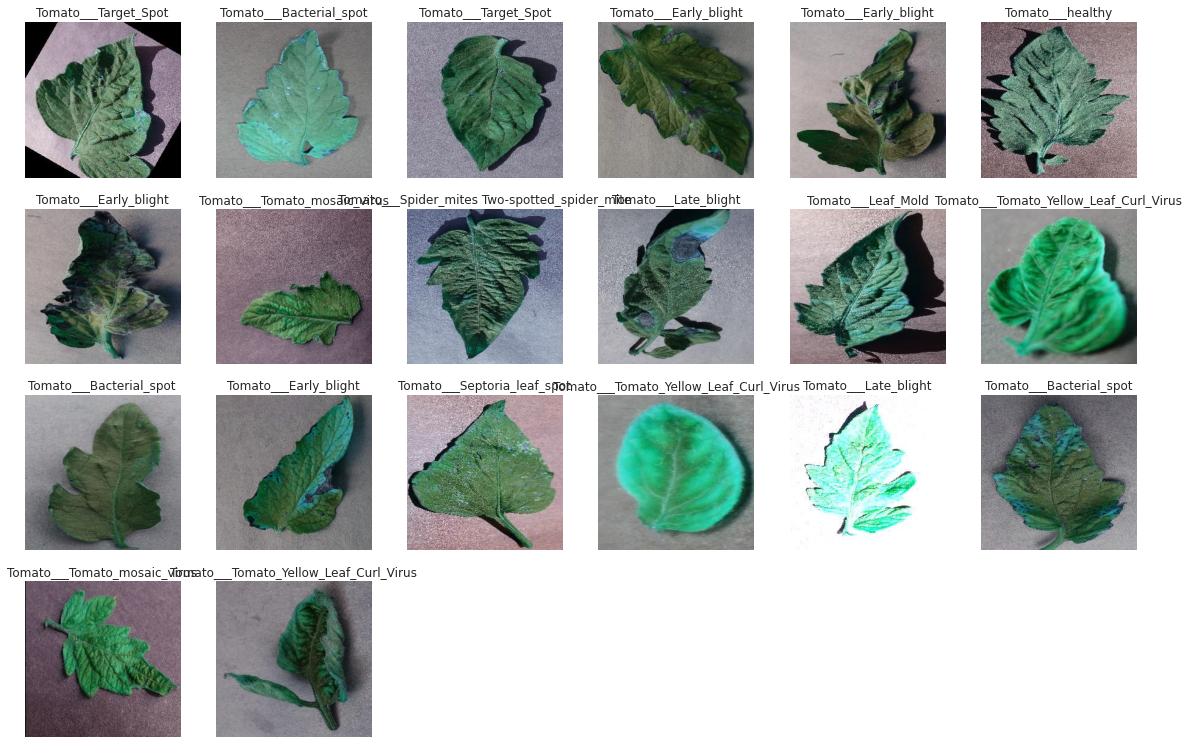

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),20))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))
